In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("../heuristics.txt", sep=" ", header=None).rename(columns={ 0:"algorithm", 1:"test_iter", 2:"node_count", 5:"total_weight", 4:"microseconds" })

In [5]:
test_graph = data[data.algorithm=='SE']

In [6]:
x_range = np.arange(1, 500)

In [69]:
test_graph

,algorithm,test_iter,node_count,3,microseconds
1,SE,1,4,95,14
4,SE,1,6,15,12
7,SE,1,48,40138,280
10,SE,1,52,9937,324
13,SE,1,96,590,1009
16,SE,1,101,760,1134
19,SE,1,152,84643,2979
22,SE,1,280,3177,9901
25,SE,1,400,17791,21826
28,SE,1,439,128690,31725


In [119]:
y_range = [(n * (n*(n-1)/2) * np.log(n)) * 0.000125 for n in x_range]
y_range2 = [(n ** 2) * 0.15 for n in x_range]

NameError: name 'y_range' is not defined

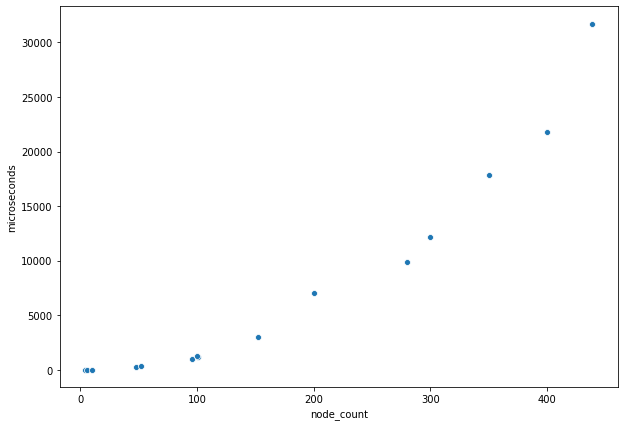

In [14]:
fig = plt.figure(figsize=(10,7))
fig = sns.scatterplot(x="node_count", y="microseconds", data=test_graph)
fig = sns.lineplot(x=x_range, y=y_range)

---

In [24]:
data = pd.read_csv("../result_ts_mvc.txt", header=None, sep=" ").rename(columns={0:'iter',1:'vcount',2:'totalWeight'})

In [25]:
font = {'family' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

In [26]:
fig = plt.figure(figsize=(10, 7))

<Figure size 720x504 with 0 Axes>

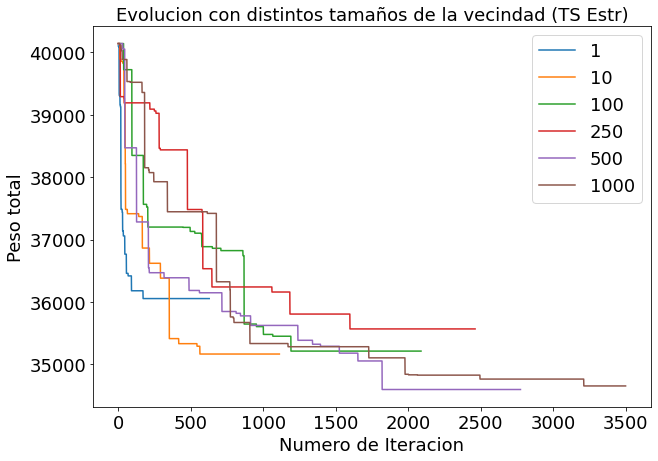

In [27]:
fig = plt.figure(figsize=(10,7))
fig = sns.lineplot(x='iter', y='totalWeight', data=data[data.vcount == 1], label='1')
fig = sns.lineplot(x='iter', y='totalWeight', data=data[data.vcount == 10], label='10')
fig = sns.lineplot(x='iter', y='totalWeight', data=data[data.vcount == 100], label='100')
fig = sns.lineplot(x='iter', y='totalWeight', data=data[data.vcount == 250], label='250')
fig = sns.lineplot(x='iter', y='totalWeight', data=data[data.vcount == 500], label='500')
fig = sns.lineplot(x='iter', y='totalWeight', data=data[data.vcount == 1000], label='1000')
fig.set_title("Evolucion con distintos tamaños de la vecindad (TS Estr)", fontsize=18)
plt.xlabel("Numero de Iteracion")
plt.ylabel("Peso total")
fig.legend()
plt.savefig("../img/vcount_evolution.png")

In [28]:
data = pd.read_csv("result_ts_mvc_mem.txt", header=None, sep=" ").rename(columns={0:'iter',1:'memSize',2:'totalWeight'})

In [29]:
data

,iter,memSize,totalWeight
0,1,1,40138
1,2,1,40138
2,3,1,40044
3,4,1,40044
4,5,1,40044
...,...,...,...
20136,2277,1000,37524
20137,2278,1000,37524
20138,2279,1000,37524
20139,2280,1000,37524


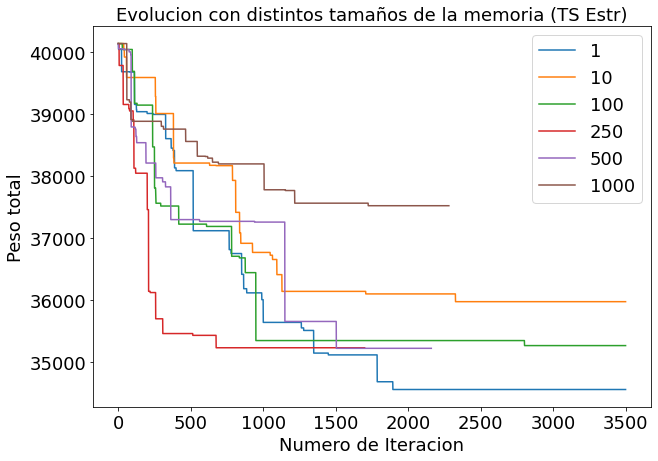

In [30]:
fig = plt.figure(figsize=(10,7))
fig = sns.lineplot(x='iter', y='totalWeight', data=data[data.memSize == 1], label='1')
fig = sns.lineplot(x='iter', y='totalWeight', data=data[data.memSize == 10], label='10')
fig = sns.lineplot(x='iter', y='totalWeight', data=data[data.memSize == 100], label='100')
fig = sns.lineplot(x='iter', y='totalWeight', data=data[data.memSize == 250], label='250')
fig = sns.lineplot(x='iter', y='totalWeight', data=data[data.memSize == 500], label='500')
fig = sns.lineplot(x='iter', y='totalWeight', data=data[data.memSize == 1000], label='1000')
fig.set_title("Evolucion con distintos tamaños de la memoria (TS Estr)", fontsize=18)
plt.xlabel("Numero de Iteracion")
plt.ylabel("Peso total")
fig.legend()
plt.savefig("../img/memSize_evolution.png")

---

In [32]:
data_ts = pd.read_csv('../preliminares.txt', sep=' ', header=None)

In [41]:
data_hs = pd.read_csv('../heuristics.txt', sep=' ', header=None).rename(columns={0:'alg',1:'iter',2:'nodeCount',3:'weight',4:'time'}).drop(columns=['iter'])

In [39]:
data_hs[['alg']].drop_duplicates()

,alg
0,AGM
1,SE
2,NN


In [44]:
data_hs['time'] = data_hs['time'] / 1000

In [49]:
data_agm = data_hs[data_hs.alg=="AGM"]
data_se = data_hs[data_hs.alg=="SE"]
data_nn = data_hs[data_hs.alg=="NN"]

In [50]:
data_agm

,alg,nodeCount,weight,time
0,AGM,4,95,0.038
3,AGM,6,16,0.040
6,AGM,48,45740,0.842
9,AGM,52,10713,1.326
12,AGM,96,665,2.977
15,AGM,101,849,3.277
18,AGM,152,90329,7.608
21,AGM,280,3682,26.141
24,AGM,400,21319,53.839
27,AGM,439,149176,66.630


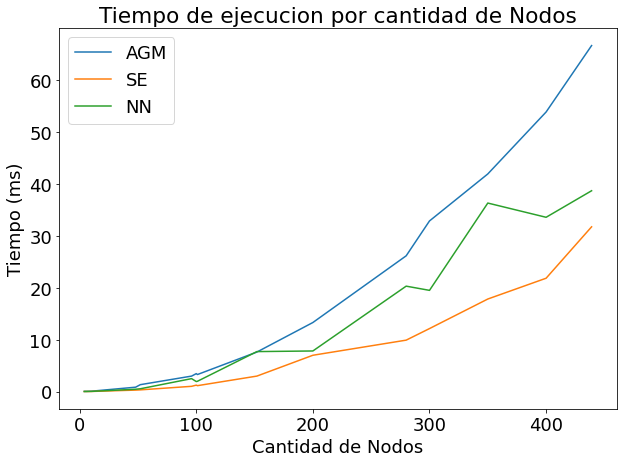

In [66]:
fig = plt.figure(figsize=(10,7))
fig = sns.lineplot(x="nodeCount", y="time", data=data_agm, markers=True, label='AGM')
fig = sns.lineplot(x="nodeCount", y="time", data=data_se, markers=True, label='SE')
fig = sns.lineplot(x="nodeCount", y="time", data=data_nn, markers=True, label='NN')
plt.xlabel("Cantidad de Nodos")
plt.ylabel("Tiempo (ms)")
plt.title("Tiempo de ejecucion por cantidad de Nodos")
plt.savefig("ex_time_heur.png")

---

In [129]:
data_ts = pd.read_csv('../preliminares.txt', sep=' ')
data_ts['timeSeconds'] = data_ts['timeMicroseconds'] / 1000000

In [133]:
data_ts[data_ts.testName.isin(['TSWSM_SE'])].groupby(['testCase','testName']).mean().round(2)[['baseResult','tsResult','timeSeconds']]
# ,'TSWSM_NN','TSWSM_SE'

,,baseResult,tsResult,timeSeconds
testCase,testName,,,
att48,TSWSM_SE,40138.00,35436.37,13.02
berlin52,TSWSM_SE,9937.00,8147.38,16.08
eil101,TSWSM_SE,759.57,661.97,69.49
gr96,TSWSM_SE,553.60,498.07,62.85
pr152,TSWSM_SE,84778.80,79536.07,141.74
rg100,TSWSM_SE,3311.43,2649.00,68.07


In [159]:
data_ts[data_ts.testCase=='pr152'][data_ts.testName=='TSWSM_SE'].sort_values(by='tsResult')[['testCase','testName','tsResult','timeSeconds']].head(30)

,testCase,testName,tsResult,timeSeconds
1384,pr152,TSWSM_SE,77065,141.557354
1375,pr152,TSWSM_SE,77099,141.915931
1387,pr152,TSWSM_SE,77799,143.675055
1386,pr152,TSWSM_SE,77889,142.628091
1378,pr152,TSWSM_SE,78197,141.452641
1390,pr152,TSWSM_SE,78233,142.107340
1377,pr152,TSWSM_SE,78265,141.373517
1389,pr152,TSWSM_SE,78417,141.695999
1374,pr152,TSWSM_SE,79067,141.572071
1388,pr152,TSWSM_SE,79167,142.257904
